
## NLP Lab 

The purpose of todays lab is to calculate and validate the customer sentiment (polarity) based on reviews of purchased womens clothing, as an introduction to using NLP techniques on text data and retrieving actionable data insights per department / division at the womens clothing company.  


> This lab has been designed to be completed at either **Starter level** or **Stretch level** - in order to accomodate different technical / time / motivation levels in the class. **Starter** - is the minimum required deliverable for today's lab, so you should complete the steps below as directed before submitting the url to your notebook via the student portal. **Stretch** will take you longer and the actions you will take are prompted, rather than prescriptive.  


You will follow the instructions and concepts you saw in class today to:
+ retrieve the data 
+ sample customer reviews using textblob
+ use a function to apply sentiment analysis to the whole data set
+ visualise the sentiment by department / division
*(optional- Stretch)*
+ visualise to validate the sentiment analysis
+ apply another sentiment analyser
+ identify and evaluate the differences between each approach

#### Each step below is given a description of what to do and key stages are accompanied by prompt images in [this folder](https://github.com/student-IH-labs-and-stuff/BER-DAFT-MAR21/tree/main/Labs/NLPscreenshots) to confirm you are on the right track 

------

### Starter steps 

1. retrieve the data from this [kaggle link](https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews)
2. install texblob onto your conda environment
3. launch jupyter notebook in the same environment, and import pandas, matplotlib/seaborn and textblob 
4. read the data into a dataframe with pandas
5. filter the data frame to a relevant subset of columns required for our data scenario (image clothing_columns.png)
6. use df.columns.str.lower() (or other preferred method) to standardise your column headers
7. EDA - with descriptive statistics (eg `describe()`, `shape`, `info()`) and/or simple charts, explore and familiarise yourself with the data at your own pace - clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)
8. use the pandas [groupby function](https://realpython.com/pandas-groupby) to summarise the average rating by division and department as a new dataframe (image clothing_rating_groupby.png)
9. this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png) 
10. OPTIONAL - if you find it difficult to do this group by and visualise task in python- you can connect to the csv with Tableau and do the same chart there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_rating_tableau.png)
11. do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at) to apply textblob over the selected review text (image clothing_sentiment_index5.png) Do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself
12. for the any selected customer review, use textblob to break out the text into sentences (image clothing_sentences.png)
13. using dropna, remove any rows in your data which contain have null in the review column ( hint your new data will be 22641 rows)
14. define a function with lambda (or other preferred method) to calculate sentiment polarity for each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)
15. using the pandas groupby function again, summarise the minimum review polarity, by division and department as a new dataframe (image clothing_min_review.png) - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0
16. visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)
17. using the pandas groupby function again, summarise the average review polarity, by division and department as a new dataframe
18. visualise this summary as a simple sorted bar chart 
19. OPTIONAL - if you find it difficult to do these group by and visualise tasks in python- you can output your data frame to a csv, then connect to that csv with Tableau and do the same charts there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_polarity_tableau.png)
20. tidy up your notebook as much as possible, removing any redundant code, and adding annotations where useful 

---- 

### Stretch guidance (optional follow on activities)

1. how accurate is the sentiment polarity calculated on this data set? how can you tell ? 
2. what are the most useful ways to visualise the sentiment polarity against the other data in the reviews data set? (hint: tableau or seaborn, exploratory data visualisation) - I have started this in Tableau - heres [my workbook](https://public.tableau.com/profile/sianedavies#!/vizhome/Customer_reviews_viz/reviewcategorytotals)
3. through sample /limited experimentation, investigate whether processing / cleaning the review text might lead to a more accurate sentiment calculation
4. textblob has an alternative, naive bayes sentiment analyser that is trained on movie reviews - do you think this could be more accurate? what features would you choose to include if training a sentiment analysis model ? 
5. could there be advantages to utilising spacy+textblob instead? why? how would you identify a sentiment tool better suited to this data set?
6. install the needed packages and apply a second sentiment analysis method, end to end to evaluate the accuracy of the first approach
7. summarise what you have learnt in a .md file to accompany your notebook or annotations /images in the notebook itself 
8. tidy up your code as much as possible, consider modularising any elements of what you have done for re-usability and efficiency

--------

### When you are ready submit your lab via the student portal (github /google colab url)






In [63]:
# 1. retrieve the data from kaggle √
# 2. install textblob onto your conda environment √
# 3. launch jupyter notebook in the same environment, and import pandas, matplotlib/seaborn and textblob √
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from tqdm import tqdm
from textblob import TextBlob 

In [2]:
# 4. Read the data into a dataframe with pandas
data = pd.read_csv("C:/Users/digit/Desktop/Ironhack/lab_work/w8d1-lab-NLP/data/Womens Clothing E-Commerce Reviews.csv")
# reassign data to df
df = data

In [3]:
# see how the data looks in a dataframe
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
# 5. filter the data frame to a relevant subset of columns required for our data scenario(image clothing_columns.png) √
# we need to get rid of these columns [Unnamed:0, Clothig ID, Age, Recommended IND, Positive Feedback Count, Class Name]
df.drop(["Unnamed: 0", "Clothing ID", "Age", "Recommended IND", "Positive Feedback Count", "Class Name"], axis=1, inplace=True)

In [5]:
df.head()

,Title,Review Text,Rating,Division Name,Department Name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [6]:
# 6. use df.columns.str.lower() (or other preferred method) to standardise your column headers √
df.columns = df.columns.str.lower()

In [7]:
# remove space and replace with underscore in columns names
df.columns = df.columns.str.replace(" ","_")

In [8]:
# check the result of our operation
df.head()

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [9]:
# 7. EDA - with descriptive statistics (eg describe(), shape, info()) and/or simple charts,
# explore and familiarise yourself with the data at your own pace
#-  clarify what each column means/contains and what cleaning steps could be employed (and if needed for our scenario)

In [10]:
df.shape
# 23486 instances and 5 features

(23486, 5)

In [11]:
df.info()
# all features have null values
# title has the biggest amount of nulls
# rating is numerical, the rest of features are categorical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19676 non-null  object
 1   review_text      22641 non-null  object
 2   rating           23486 non-null  int64 
 3   division_name    23472 non-null  object
 4   department_name  23472 non-null  object
dtypes: int64(1), object(4)
memory usage: 917.5+ KB


In [12]:
df.describe()
# rating is the only numerical feature
# the ratings are from 1-5 
# a rating for each review

,rating
count,23486.000000
mean,4.196032
std,1.110031
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [13]:
# detect missing values
df.isnull().sum()
# as said above
# 3810 nulls in title
# 845 nulls in review text
# rating without nulls
# 14 nulls in division name and department name (negligible amounts)

title              3810
review_text         845
rating                0
division_name        14
department_name      14
dtype: int64

In [14]:
# calculate the percentage of nulls
nulls_perc = df.isnull().sum() * 100 / len(df)
nulls_perc
# according to what we have learnt in Unit 1 the percentage is so low that it would not pay off to get rid of the nulls.

title              16.222430
review_text         3.597888
rating              0.000000
division_name       0.059610
department_name     0.059610
dtype: float64

In [15]:
# 8. use the pandas groupby function to summarise the average rating 
# by division and department as a new dataframe (image clothing_rating_groupby.png)
avg_rating_sum = pd.DataFrame(df.groupby(["division_name", "department_name"]).rating.mean().sort_values())
avg_rating_sum

rating
division_name  department_name          
General Petite Trend            3.782609
General        Trend            3.822917
General Petite Dresses          4.133256
General        Tops             4.148749
               Dresses          4.163003
General Petite Tops             4.216469
General        Jackets          4.240310
General Petite Intimate         4.240343
General        Bottoms          4.268686
Initmates      Intimate         4.286285
General Petite Jackets          4.304910
               Bottoms          4.329356

In [16]:
avg_rating_sum.reset_index()

,division_name,department_name,rating
0,General Petite,Trend,3.782609
1,General,Trend,3.822917
2,General Petite,Dresses,4.133256
3,General,Tops,4.148749
4,General,Dresses,4.163003
5,General Petite,Tops,4.216469
6,General,Jackets,4.240310
7,General Petite,Intimate,4.240343
8,General,Bottoms,4.268686
9,Initmates,Intimate,4.286285


<AxesSubplot:ylabel='division_name,department_name'>

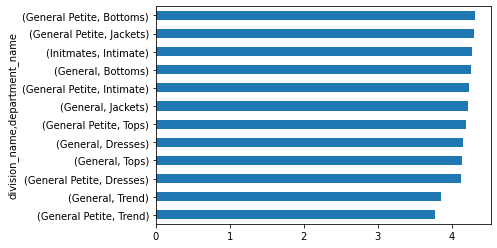

In [62]:
# 9. this dataframe can be easily visualised as a bar chart - do so now (image clothing_rating_chart.png)
group_div_dep = df.groupby(["division_name", "department_name"]).rating.mean().sort_values()
group_div_dep.plot(kind="barh")

Text(0.5, 1.0, 'Grouped Barplot: Rating by Department Name, Division Name')

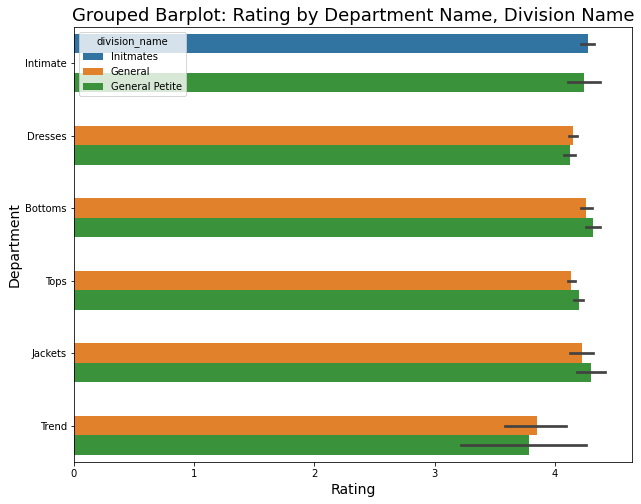

In [64]:
# perhaps we better achieve the viz like this
plt.figure(figsize=(10, 8))
sns.barplot(x="rating", 
            y="department_name", 
            hue="division_name", 
            data=df)
plt.ylabel("Department", size=14)
plt.xlabel("Rating", size=14)
plt.title("Grouped Barplot: Rating by Department Name, Division Name", size=18)

In [55]:
# 10. OPTIONAL - if you find it difficult to do this group by and visualise task in python- you can connect to the csv with Tableau and do the same chart there!
# this is also a useful exercise to remind you of how to work with Tableau (image clothing_rating_tableau.png)
# already done in Python, so we will skip this question :)

In [19]:
# 11. do a spot /sample check on the review column, index position 5 (hint: iloc/loc/at)
# to apply textblob over the selected review text (image clothing_sentiment_index5.png) 
df.head(6)

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,General,Dresses


In [20]:
# spot check with loc
df.loc[5, ["review_text"]].to_frame()

,5
review_text,"I love tracy reese dresses, but this one is no..."


In [21]:
# apply textblob over the selected review text
testimonial5 = TextBlob(df.at[5, "review_text"])
testimonial5.sentiment 

Sentiment(polarity=0.17874999999999996, subjectivity=0.533125)

In [22]:
# do this for at least 3 samples to evaluate the accuracy of the sentiment polarity and subjectivity against the text itself
# 2.sample
df.loc[1, ["review_text"]]

review_text    Love this dress!  it's sooo pretty.  i happene...
Name: 1, dtype: object

In [23]:
# 2.sample
testimonial1 = TextBlob(df.at[1, "review_text"])
testimonial1.sentiment

Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)

In [24]:
# 3.sample
df.loc[2, ["review_text"]]

review_text    I had such high hopes for this dress and reall...
Name: 2, dtype: object

In [25]:
# 3.sample
testimonial2 = TextBlob(df.at[2, "review_text"])
testimonial2.sentiment 

Sentiment(polarity=0.07367494824016563, subjectivity=0.35629399585921323)

In [26]:
# 12. for the any selected customer review,
# use textblob to break out the text into sentences (image clothing_sentences.png)
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\digit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
zen = TextBlob(df.at[5, "review_text"])
zen.sentences

[Sentence("I love tracy reese dresses, but this one is not for the very petite."),
 Sentence("i am just under 5 feet tall and usually wear a 0p in this brand."),
 Sentence("this dress was very pretty out of the package but its a lot of dress."),
 Sentence("the skirt is long and very full so it overwhelmed my small frame."),
 Sentence("not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment."),
 Sentence("i love the color and the idea of the style but it just did not work on me."),
 Sentence("i returned this dress.")]

In [28]:
zen1 = TextBlob(df.at[6, "review_text"])
zen1.sentences

[Sentence("I aded this in my basket at hte last mintue to see what it would look like in person."),
 Sentence("(store pick up)."),
 Sentence("i went with teh darkler color only because i am so pale :-) hte color is really gorgeous, and turns out it mathced everythiing i was trying on with it prefectly."),
 Sentence("it is a little baggy on me and hte xs is hte msallet size (bummer, no petite)."),
 Sentence("i decided to jkeep it though, because as i said, it matvehd everything."),
 Sentence("my ejans, pants, and the 3 skirts i waas trying on (of which i ]kept all ) oops.")]

In [29]:
zen2 = TextBlob(df.at[7, "review_text"])
zen2

TextBlob("I ordered this in carbon for store pick up, and had a ton of stuff (as always) to try on and used this top to pair (skirts and pants). everything went with it. the color is really nice charcoal with shimmer, and went well with pencil skirts, flare pants, etc. my only compaint is it is a bit big, sleeves are long and it doesn't go in petite. also a bit loose for me, but no xxs... so i kept it and wil ldecide later since the light color is already sold out in hte smallest size...")

In [31]:
# 13.using dropna, remove any rows in your data which contain have null in the review column
# (hint your new data will be 22641 rows)
# drop the NA in the review column

# df["review_text"].dropna()
df = df.dropna(subset=["review_text"])

In [32]:
# check the results
# review_text has 0 nulls
df.isna().sum()

title              2966
review_text           0
rating                0
division_name        13
department_name      13
dtype: int64

In [33]:
# 22641 rows in review_text as  we can see
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            19675 non-null  object
 1   review_text      22641 non-null  object
 2   rating           22641 non-null  int64 
 3   division_name    22628 non-null  object
 4   department_name  22628 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


In [34]:
# 14. define a function with lambda (or other preferred method) to calculate sentiment polarity for
# each row of the filtered review data set, as a new column on the data frame. (image clothing_sentiment_allrows.png)

# define the function first
# with a simple error handling

def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None

In [35]:
df.head()

,title,review_text,rating,division_name,department_name
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops


In [38]:
# apply lambda
df["polarity"] = df["review_text"].apply(sentiment).apply(lambda x:x[0])

<ipython-input-38-ae6fcf725539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["polarity"] = df["review_text"].apply(sentiment).apply(lambda x:x[0])


In [39]:
df.head()

,title,review_text,rating,division_name,department_name,polarity
0,NaN,Absolutely wonderful - silky and sexy and comf...,4,Initmates,Intimate,0.633333
1,NaN,Love this dress! it's sooo pretty. i happene...,5,General,Dresses,0.339583
2,Some major design flaws,I had such high hopes for this dress and reall...,3,General,Dresses,0.073675
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,General Petite,Bottoms,0.550000
4,Flattering shirt,This shirt is very flattering to all due to th...,5,General,Tops,0.512891


In [43]:
# 15. using the pandas groupby function again, summarise the minimum review polarity,
# by division and department as a new dataframe (image clothing_min_review.png)
# - this means whats the lowest sentiment score seen in each department and division - so everything will be less than 0

min_review_polarity_sum = df.groupby(["division_name", "department_name"], as_index=False)["polarity"].min()
min_review_polarity_sum

,division_name,department_name,polarity
0,General,Bottoms,-0.533333
1,General,Dresses,-0.916667
2,General,Jackets,-0.750000
3,General,Tops,-0.975000
4,General,Trend,-0.270833
5,General Petite,Bottoms,-0.257778
6,General Petite,Dresses,-0.400000
7,General Petite,Intimate,-0.575000
8,General Petite,Jackets,-0.562500
9,General Petite,Tops,-0.700000


<AxesSubplot:xlabel='polarity', ylabel='department_name'>

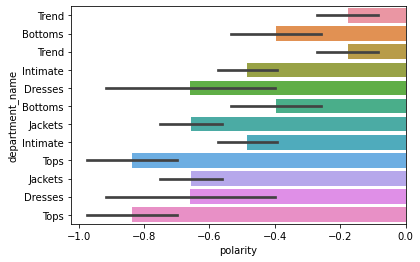

In [47]:
# 16. visualise this summary as a simple sorted bar chart (image clothing_min_review_chart.png)
sns.barplot(x="polarity", y="department_name", data=min_review_polarity_sum, order=min_review_polarity_sum.sort_values("polarity", ascending=False).department_name)

In [48]:
# 17. using the pandas groupby function again,
# summarise the average review polarity, by division and department as a new dataframe
avg_review_polarity_sum = df.groupby(["division_name", "department_name"], as_index=False)["polarity"].mean()
avg_review_polarity_sum

,division_name,department_name,polarity
0,General,Bottoms,0.245849
1,General,Dresses,0.251091
2,General,Jackets,0.237141
3,General,Tops,0.247025
4,General,Trend,0.203986
5,General Petite,Bottoms,0.259258
6,General Petite,Dresses,0.248380
7,General Petite,Intimate,0.239517
8,General Petite,Jackets,0.241773
9,General Petite,Tops,0.256835


<AxesSubplot:xlabel='polarity', ylabel='department_name'>

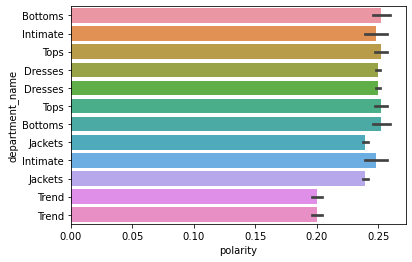

In [52]:
# 18. visualise this summary as a simple sorted bar chart
sns.barplot(x="polarity", y="department_name", data=avg_review_polarity_sum, order=avg_review_polarity_sum.sort_values("polarity", ascending=False).department_name)

In [53]:
# 19. OPTIONAL - if you find it difficult to do these group by and visualise tasks in python- you can output your data frame to a csv, then connect to that csv with Tableau and do the same charts there! this is also a useful exercise to remind you of how to work with Tableau (image clothing_polarity_tableau.png)

In [ ]:
#20. tidy up your notebook as much as possible, removing any redundant code, and adding annotations where useful